In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
libya_dataset = xr.open_mfdataset('C:\\Users\\sulemana nyaaba\\Desktop\\Dr Jeff\\*.nc')
libya_dataset

<xarray.Dataset>
Dimensions:   (datetime: 4018, lat: 57, lon: 65)
Coordinates:
  * lon       (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat       (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 57, 65), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
libya_RR = libya_dataset.sel(datetime=slice("2011","2020"),lon=(25.25),lat=(19.5))
libya_RR

<xarray.Dataset>
Dimensions:   (datetime: 3653)
Coordinates:
    lon       float32 25.25
    lat       float32 19.5
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [5]:
libya_precip = libya_RR['precip']
libya_precip

<xarray.DataArray 'precip' (datetime: 3653)>
dask.array<getitem, shape=(3653,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 25.25
    lat       float32 19.5
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  crs

In [6]:
monthly_rainfall = libya_precip.resample(datetime='1M').sum('datetime')
monthly_rainfall

<xarray.DataArray 'precip' (datetime: 120)>
dask.array<stack, shape=(120,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-31 2011-02-28 ... 2020-12-31
    lon       float32 25.25
    lat       float32 19.5

In [7]:
monthly_climatology = monthly_rainfall.groupby('datetime.month').mean()
monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 25.25
    lat      float32 19.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [8]:
annual_rainfall_totals = libya_precip.resample(datetime='1Y').sum()
annual_rainfall_totals

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-12-31 2012-12-31 ... 2020-12-31
    lon       float32 25.25
    lat       float32 19.5

In [9]:
annual_average = annual_rainfall_totals.groupby('datetime.month').mean()
annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 25.25
    lat      float32 19.5
  * month    (month) int64 12

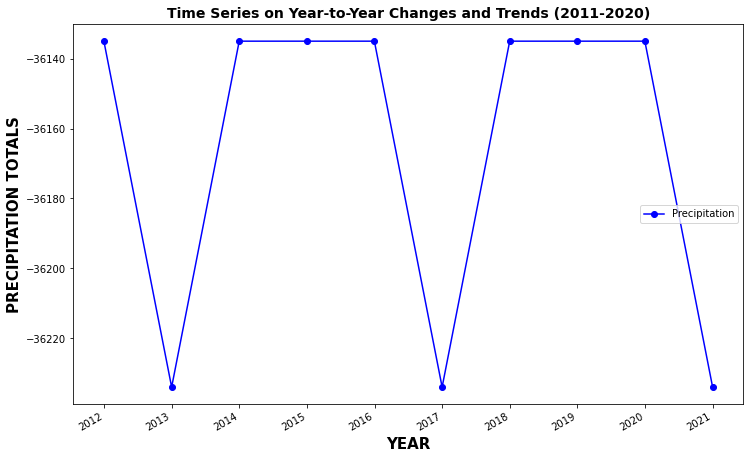

<Figure size 432x288 with 0 Axes>

In [42]:
fig, ax = plt.subplots(figsize = (12,7))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_rainfall_totals.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Time Series on Year-to-Year Changes and Trends (2011-2020)',fontweight = 'bold', fontsize = 14,color = 'black')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'black')
ax.set_ylabel('PRECIPITATION TOTALS', fontweight = 'bold', fontsize = 15,color = 'black')
plt.legend()
plt.show()
plt.savefig('fig1.png');

In [11]:
libya_dataset2 = xr.open_mfdataset('C:\\Users\\sulemana nyaaba\\Desktop\\Dr Jeff\\*.nc')
libya_dataset2

<xarray.Dataset>
Dimensions:   (datetime: 4018, lat: 57, lon: 65)
Coordinates:
  * lon       (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat       (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 57, 65), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [12]:
libya_precip2 = libya_dataset2['precip']
libya_precip2

<xarray.DataArray 'precip' (datetime: 4018, lat: 57, lon: 65)>
dask.array<concatenate, shape=(4018, 57, 65), dtype=float32, chunksize=(366, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat       (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  crs

In [13]:
lib = libya_precip2
dry_days_per_year = (lib < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 11, lat: 57, lon: 65)>
dask.array<stack, shape=(11, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

In [14]:
dry_days_per_year.shape

(11, 57, 65)

<ipython-input-43-e19244fc3b39>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar=fig.add_axes([0.82,0.29,0.025,0.5])


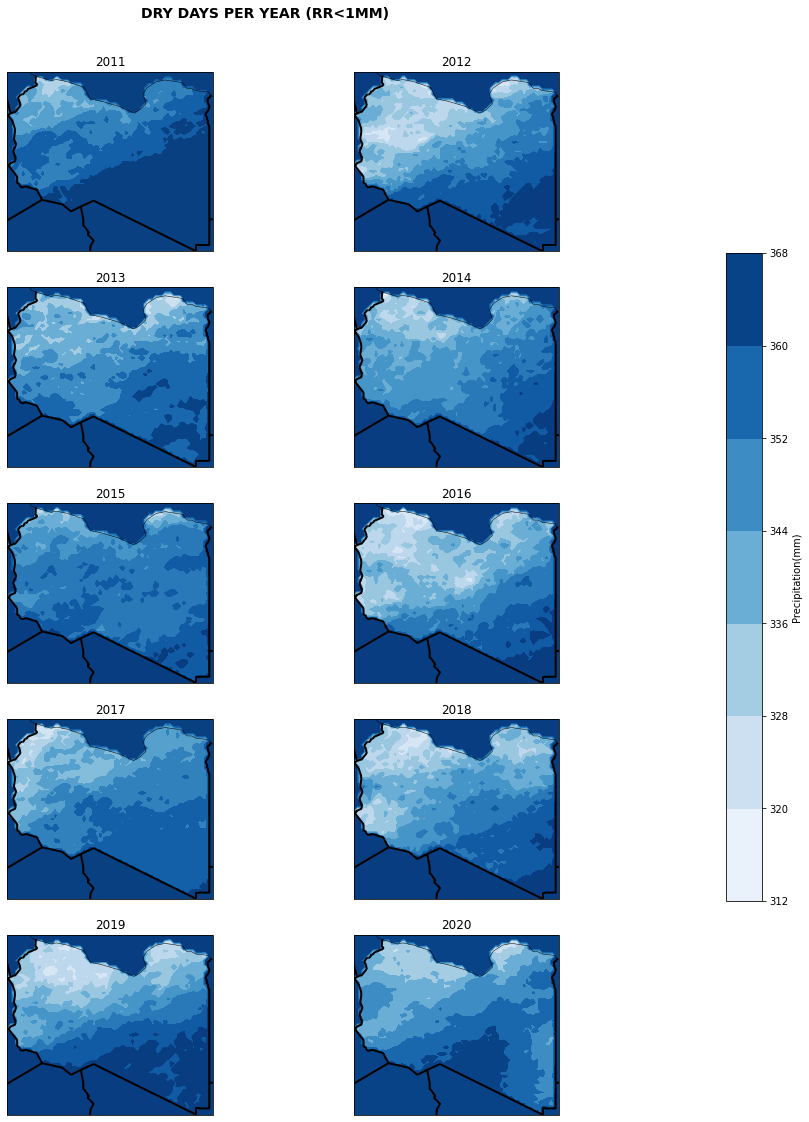

In [43]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
years=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(years[i])
    cb= ax[i].contourf(dry_days_per_year.lon, dry_days_per_year.lat, dry_days_per_year[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('DRY DAYS PER YEAR (RR<1MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig2.png');

In [16]:
wet_days_per_year = (lib >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year

<xarray.DataArray 'precip' (year: 11, lat: 57, lon: 65)>
dask.array<stack, shape=(11, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

<ipython-input-44-dd9c94ab1546>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar=fig.add_axes([0.82,0.29,0.025,0.5])


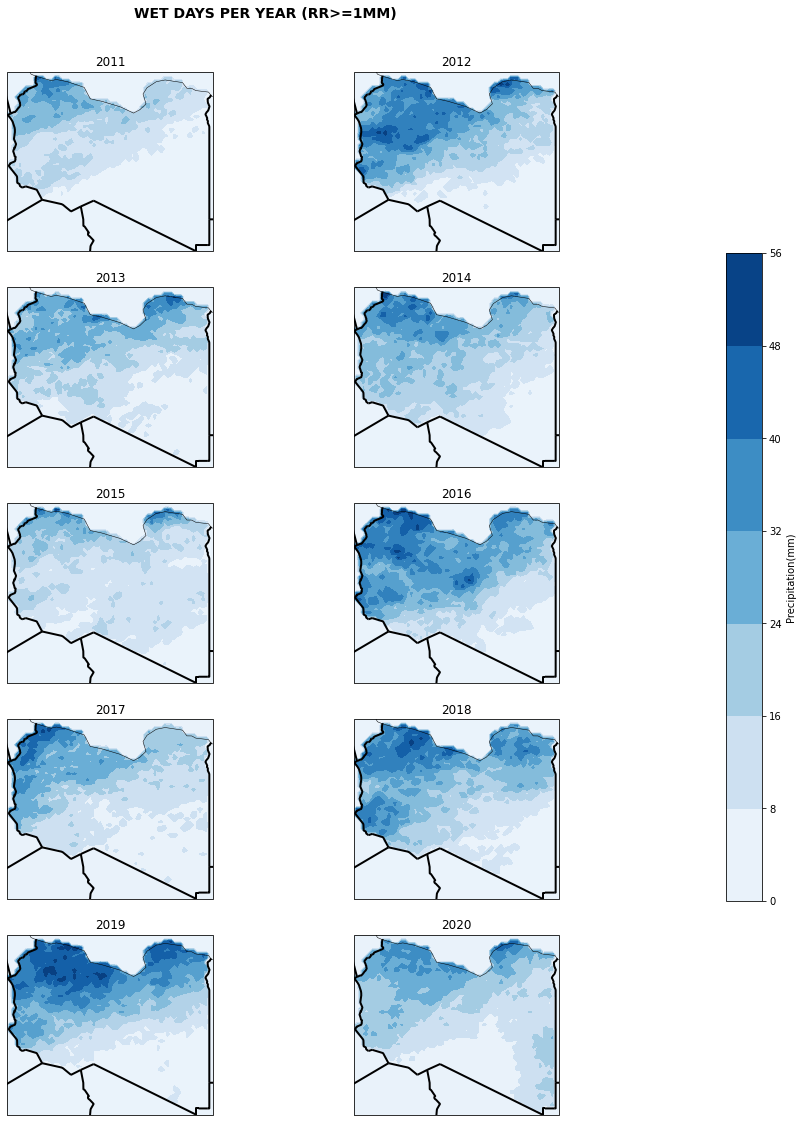

In [44]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
years=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(years[i])
    cb= ax[i].contourf(wet_days_per_year.lon, wet_days_per_year.lat, wet_days_per_year[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('WET DAYS PER YEAR (RR>=1MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig3.png');

In [18]:
wet_days_per_month = (lib >= 1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month

<xarray.DataArray 'precip' (month: 12, lat: 57, lon: 65)>
dask.array<stack, shape=(12, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

<ipython-input-45-3edb001773e4>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar = fig.add_axes([0.82,0.29,0.025,0.5])


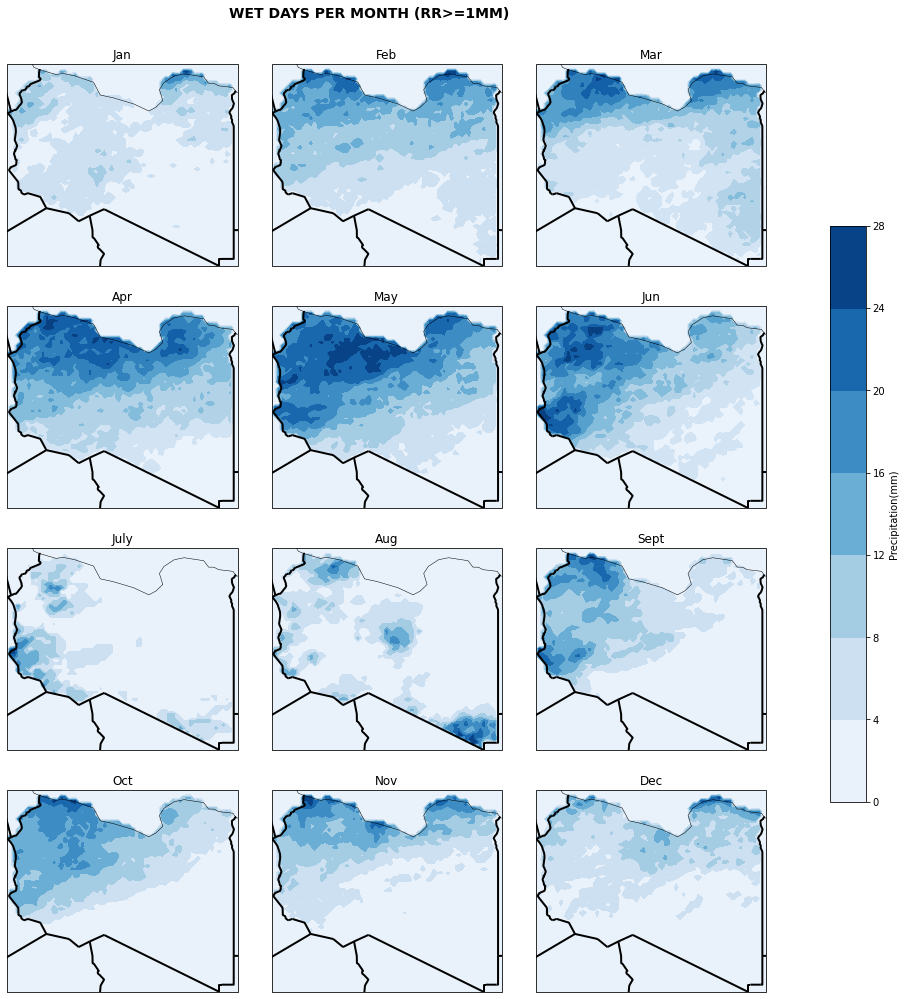

In [45]:
fig,ax = plt.subplots(4,3,figsize=(20,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax = ax.flatten()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])
    cb= ax[i].contourf(wet_days_per_month.lon, wet_days_per_month.lat, wet_days_per_month[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax = color_bar, label = 'Precipitation(mm)')
fig.subplots_adjust(wspace = -0.55, top = 0.93)
plt.suptitle('WET DAYS PER MONTH (RR>=1MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig4.png');

In [20]:
dry_days_per_month = (lib < 1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month

<xarray.DataArray 'precip' (month: 12, lat: 57, lon: 65)>
dask.array<stack, shape=(12, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

<ipython-input-46-14010f61d9fd>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar = fig.add_axes([0.82,0.29,0.025,0.5])


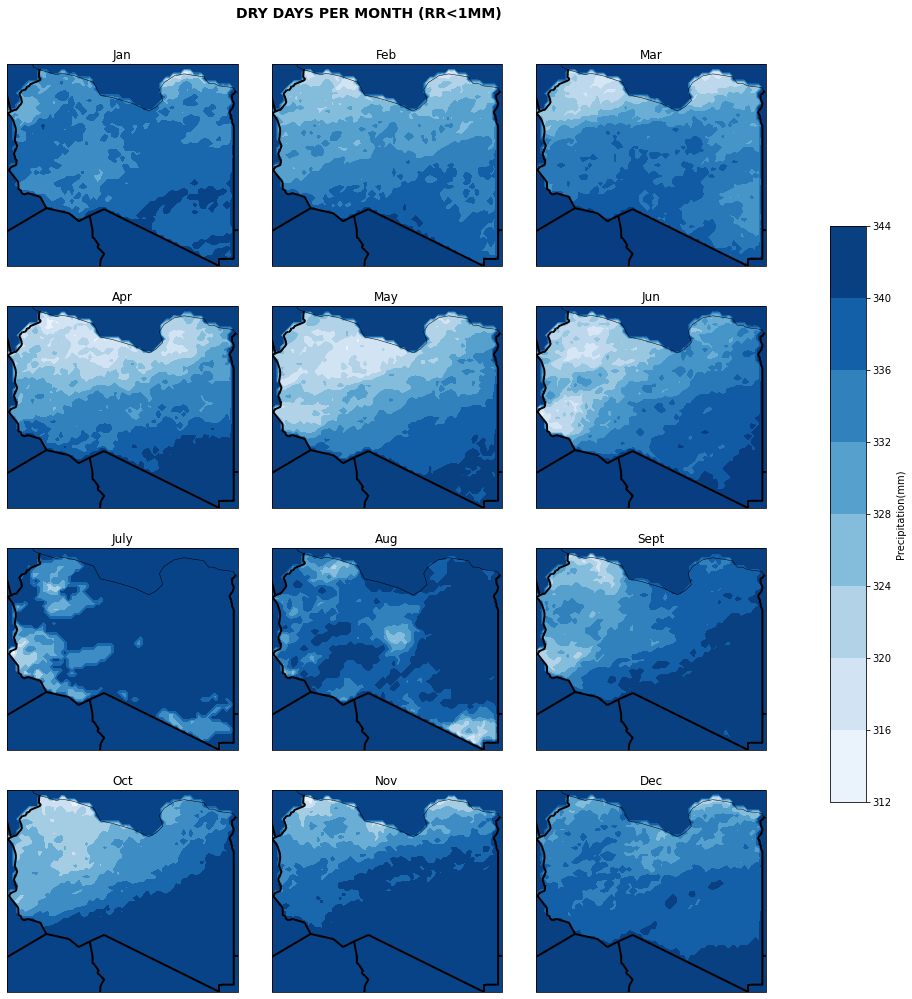

In [46]:
fig,ax = plt.subplots(4,3,figsize=(20,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax = ax.flatten()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])
    cb= ax[i].contourf(dry_days_per_month.lon, dry_days_per_month.lat, dry_days_per_month[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax = color_bar, label = 'Precipitation(mm)')
fig.subplots_adjust(wspace = -0.55, top = 0.93)
plt.suptitle('DRY DAYS PER MONTH (RR<1MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig5.png');

In [22]:
wet_days_per_year2 = (lib > 10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 11, lat: 57, lon: 65)>
dask.array<stack, shape=(11, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

<ipython-input-47-b702db2a1d15>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar=fig.add_axes([0.82,0.29,0.025,0.5])


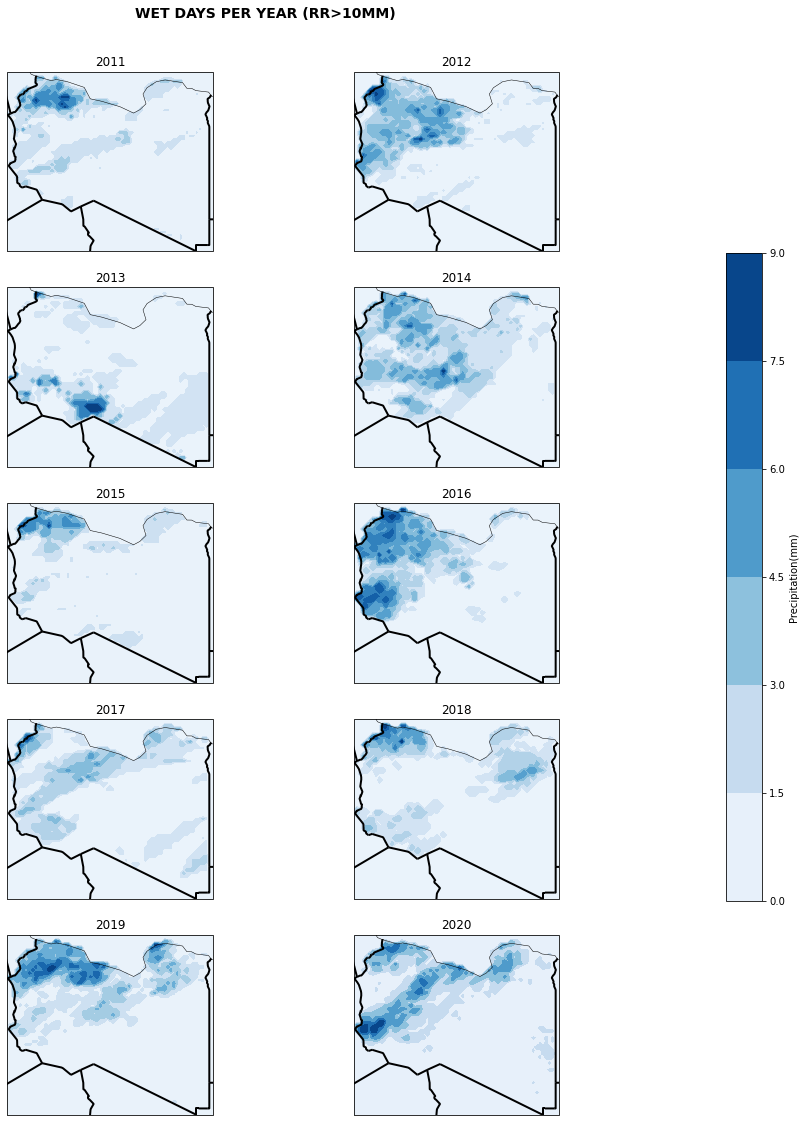

In [47]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
years=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(years[i])
    cb= ax[i].contourf(wet_days_per_year2.lon, wet_days_per_year2.lat, wet_days_per_year2[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('WET DAYS PER YEAR (RR>10MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig6.png');

In [24]:
wet_days_per_year3 = (lib > 20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year3

<xarray.DataArray 'precip' (year: 11, lat: 57, lon: 65)>
dask.array<stack, shape=(11, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * year     (year) int64 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

<ipython-input-48-bcb8abbe22fa>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar=fig.add_axes([0.82,0.29,0.025,0.5])


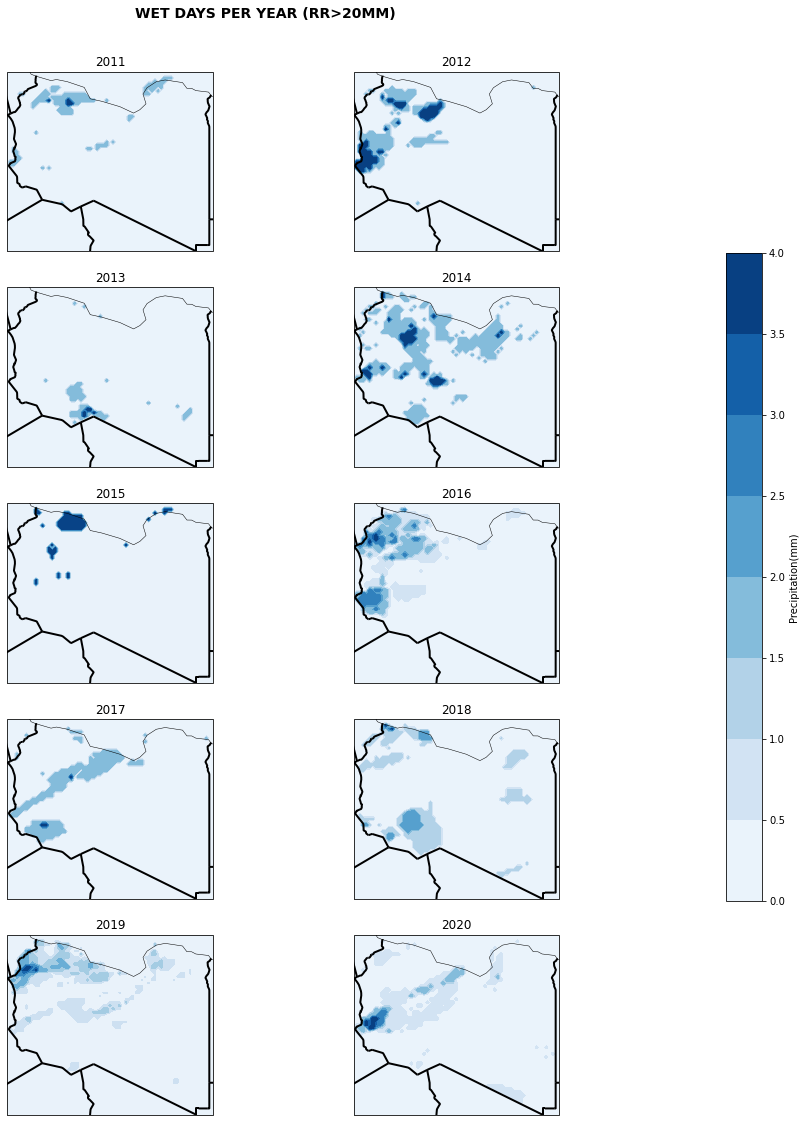

In [48]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
years=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(years[i])
    cb= ax[i].contourf(wet_days_per_year3.lon, wet_days_per_year3.lat, wet_days_per_year3[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('WET DAYS PER YEAR (RR>20MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig7.png');

In [26]:
wet_days_per_month2 = (lib > 10).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 57, lon: 65)>
dask.array<stack, shape=(12, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

<ipython-input-49-db3f0402e925>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar = fig.add_axes([0.82,0.29,0.025,0.5])


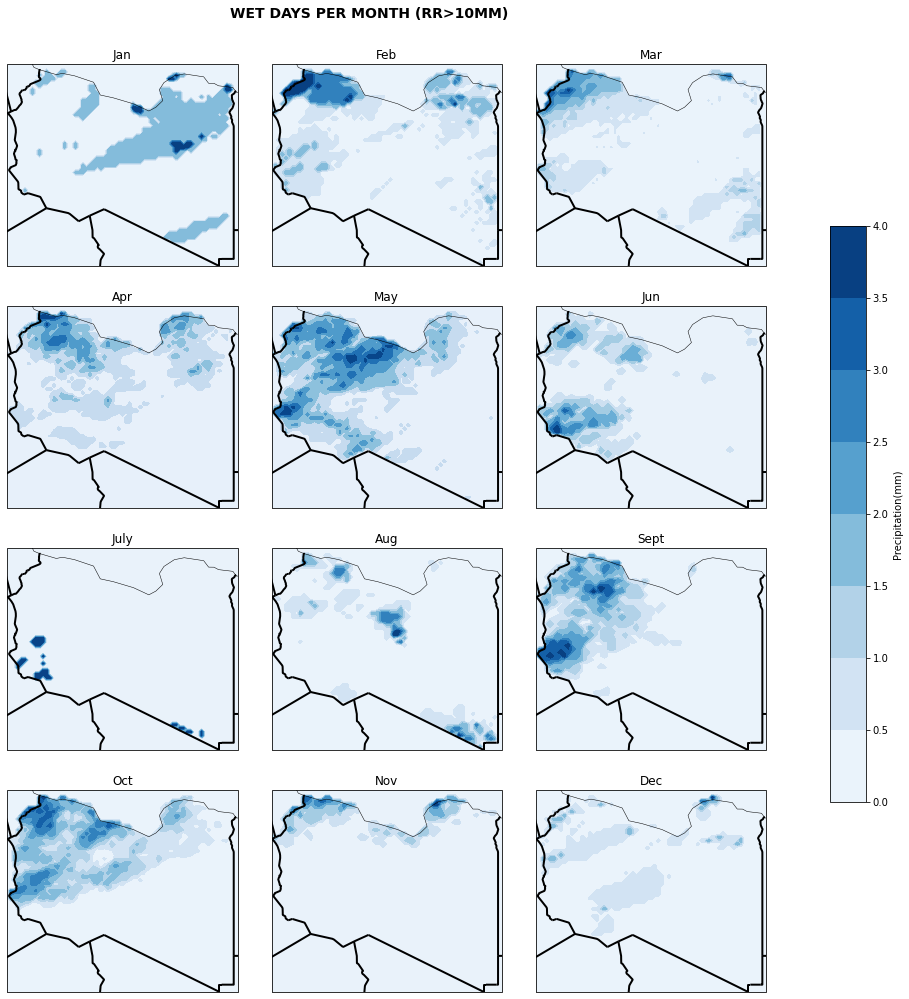

In [49]:
fig,ax = plt.subplots(4,3,figsize=(20,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax = ax.flatten()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])
    cb= ax[i].contourf(wet_days_per_month2.lon, wet_days_per_month2.lat, wet_days_per_month2[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax = color_bar, label = 'Precipitation(mm)')
fig.subplots_adjust(wspace = -0.55, top = 0.93)
plt.suptitle('WET DAYS PER MONTH (RR>10MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig8.png');

In [28]:
wet_days_per_month3 = (lib > 20).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month3

<xarray.DataArray 'precip' (month: 12, lat: 57, lon: 65)>
dask.array<stack, shape=(12, 57, 65), dtype=int32, chunksize=(1, 57, 65), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 9.25 9.5 9.75 10.0 10.25 ... 24.5 24.75 25.0 25.25
  * lat      (lat) float32 33.5 33.25 33.0 32.75 32.5 ... 20.25 20.0 19.75 19.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

<ipython-input-50-dd22ed7ab2ea>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color_bar = fig.add_axes([0.82,0.29,0.025,0.5])


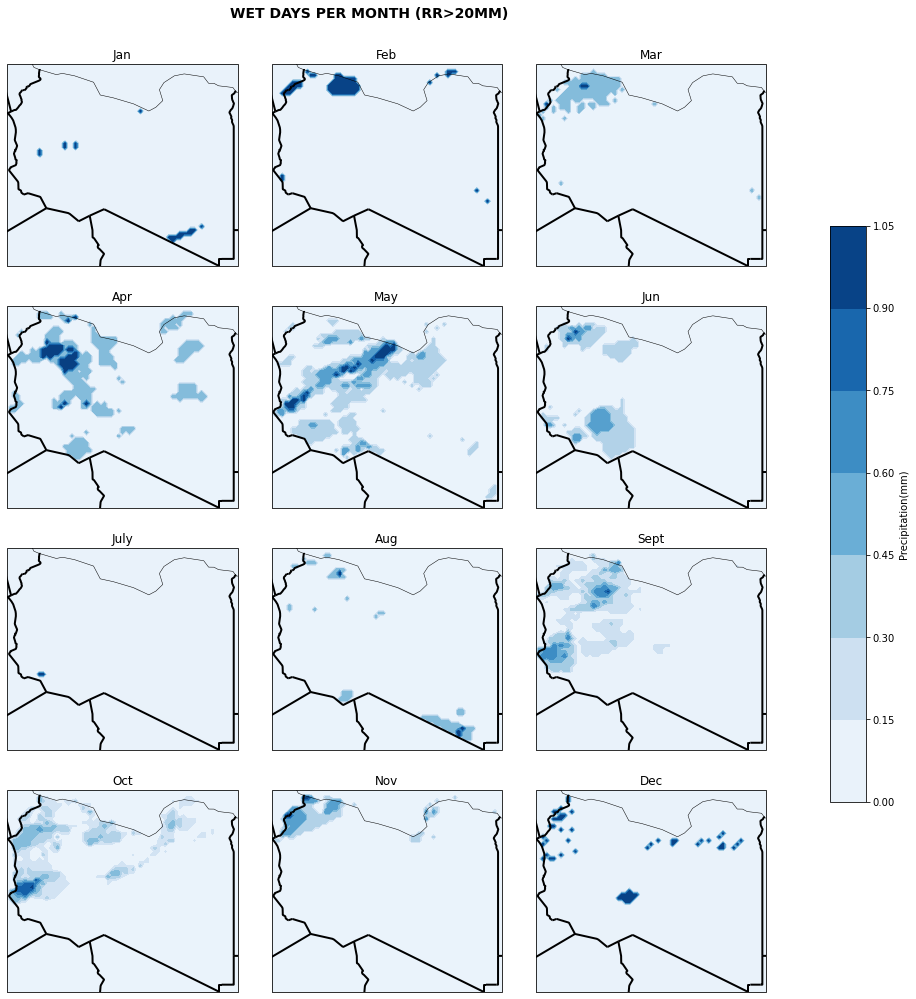

In [50]:
fig,ax = plt.subplots(4,3,figsize=(20,16),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax = ax.flatten()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([9.25, 25.25, 19.5, 33.5], crs=ccrs.PlateCarree())
    ax[i].set_title(months[i])
    cb= ax[i].contourf(wet_days_per_month3.lon, wet_days_per_month3.lat, wet_days_per_month3[i],
                       cmap='Blues', transform=ccrs.PlateCarree())
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax = color_bar, label = 'Precipitation(mm)')
fig.subplots_adjust(wspace = -0.55, top = 0.93)
plt.suptitle('WET DAYS PER MONTH (RR>20MM)', fontweight='bold', fontsize = 14,color = 'black');
plt.savefig('fig9.png');

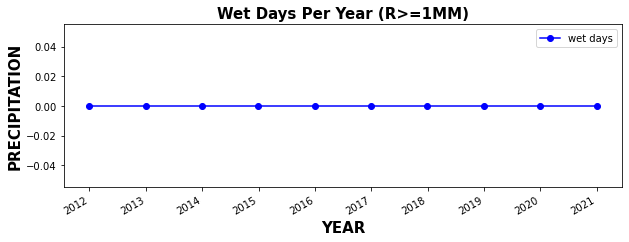

<Figure size 432x288 with 0 Axes>

In [51]:
annual_wet_days = (libya_RR['precip']>=1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Wet Days Per Year (R>=1MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig10.png');

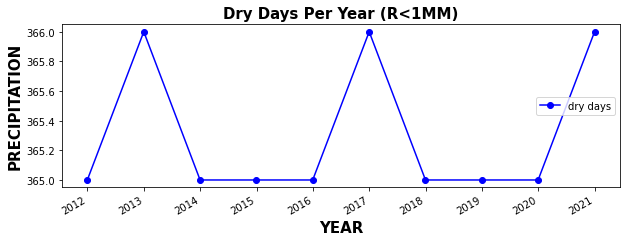

<Figure size 432x288 with 0 Axes>

In [52]:
annual_dry_days = (libya_RR['precip']<1).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_dry_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='dry days')
ax.set_title('Dry Days Per Year (R<1MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig11.png');

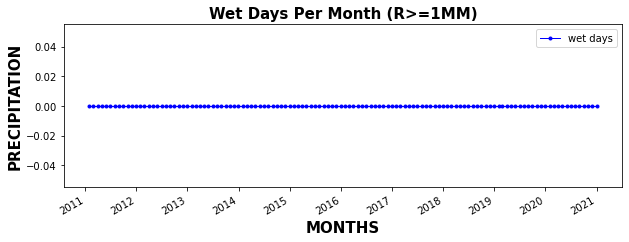

<Figure size 432x288 with 0 Axes>

In [53]:
monthly_wet_days = (libya_RR['precip']>=1).resample(datetime='1M').sum('datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_wet_days.plot(color = 'blue', lw = 1.0, marker = 'o', markersize = '3',label='wet days')
ax.set_title('Wet Days Per Month (R>=1MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig12.png');

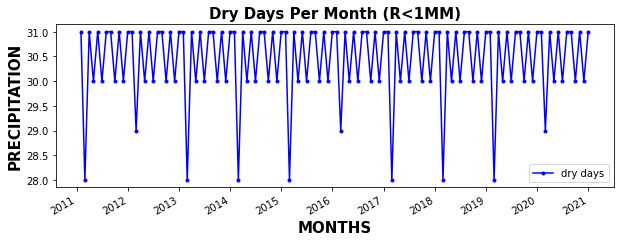

<Figure size 432x288 with 0 Axes>

In [54]:
monthly_dry_days = (libya_RR['precip']<1).resample(datetime='1M').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_dry_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '3',label='dry days')
ax.set_title('Dry Days Per Month (R<1MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig14.png');

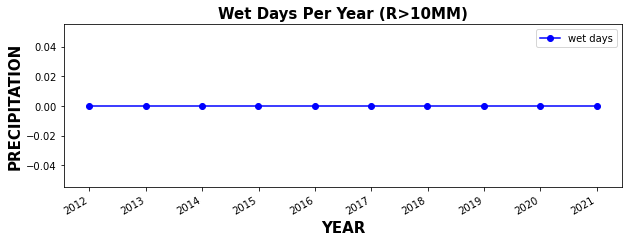

<Figure size 432x288 with 0 Axes>

In [55]:
annual_wet_days2 = (libya_RR['precip']>10).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Wet Days Per Year (R>10MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig15.png');

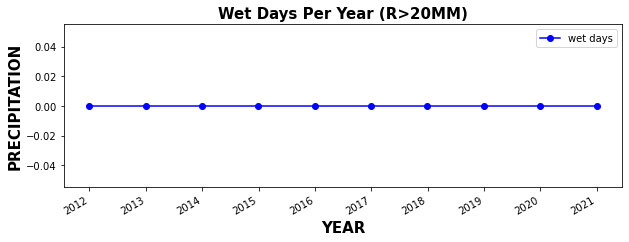

<Figure size 432x288 with 0 Axes>

In [56]:
annual_wet_days3 = (libya_RR['precip']>20).resample(datetime='1Y').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='wet days')
ax.set_title('Wet Days Per Year (R>20MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig16.png');

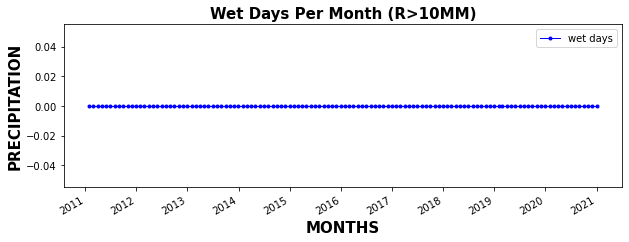

<Figure size 432x288 with 0 Axes>

In [57]:
monthly_wet_days2 = (libya_RR['precip']>10).resample(datetime='1M').sum('datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_wet_days.plot(color = 'blue', lw = 1.0, marker = 'o', markersize = '3',label='wet days')
ax.set_title('Wet Days Per Month (R>10MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig17.png');

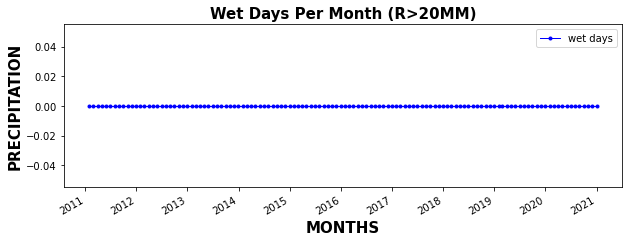

<Figure size 432x288 with 0 Axes>

In [58]:
monthly_wet_days3 = (libya_RR['precip']>20).resample(datetime='1M').sum('datetime')
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_wet_days.plot(color = 'blue', lw = 1.0, marker = 'o', markersize = '3',label='wet days')
ax.set_title('Wet Days Per Month (R>20MM)',fontweight = 'bold', fontsize = 15,color='black')
ax.set_xlabel('MONTHS', fontweight = 'bold', fontsize = 15,color='black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 15,color='black')
plt.legend()
plt.show()
plt.savefig('fig18.png');